<a href="https://colab.research.google.com/github/jdre1/Machine-Learning-Bootcamp/blob/main/supervised/01_basic/missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Import of libraries

In [81]:
import pandas as pd
import numpy as np
import sklearn
import os
import seaborn as sns
import matplotlib.pyplot as plt

##### Creating of DataFrame

In [82]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}
df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [83]:
df_raw.info()

for col in ['size','color','gender','bought']:
    df_raw[col] = df_raw[col].astype('category')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   6 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  4 non-null      float64 
 5   bought  6 non-null      category
dtypes: category(4), float64(2)
memory usage: 760.0 bytes


In [84]:
pd.isnull(df_raw).sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [85]:
round((pd.isnull(df_raw).sum()/len(df_raw))*100, 3)

size      16.667
color      0.000
gender    16.667
price     16.667
weight    33.333
bought     0.000
dtype: float64

##### Calculation of percentage of NaNs within columns in DataFrame

In [96]:
for col in df_raw:
    print('The percentage of NaN in Data Frame in column {} amounts to {}%'
    .format(col, 
            round((pd.isnull(df_raw[col]).sum()/len(df_raw[col]))*100, 2)))

The percentage of NaN in Data Frame in column size amounts to 16.67%
The percentage of NaN in Data Frame in column color amounts to 0.0%
The percentage of NaN in Data Frame in column gender amounts to 16.67%
The percentage of NaN in Data Frame in column price amounts to 16.67%
The percentage of NaN in Data Frame in column weight amounts to 33.33%
The percentage of NaN in Data Frame in column bought amounts to 0.0%


In [87]:
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [88]:
df_1 = df_raw.copy()
df_1

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


##### Imputing float values inplace on NaN with library sklearn.impute, with strategy = 'mean'. As far as strategies are concerned instead of mean we may also use median.

In [89]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_1[['price', 'weight']] = imputer.fit_transform(df_1[['price', 'weight']])
df_1

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,117.0,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


##### Imputing most frequent values into categorical variables by using library sklearn.impute -> SimpleImputer

In [90]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_1[['size', 'color', 'gender']] = imputer.fit_transform(df_1[['size', 
                                                                'color', 
                                                                'gender']])
df_1

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,female,117.0,300.0,yes
3,M,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_1[['price','weight']] = scaler.fit_transform(df_1[['price','weight']])
df_1

,size,color,gender,price,weight,bought
0,XL,red,female,2.020743,1.413399,yes
1,L,green,male,-0.690010,0.581988,no
2,M,blue,female,0.000000,-1.912245,yes
3,M,green,female,0.295718,0.000000,no
4,M,red,female,-0.936442,-0.083141,yes
5,M,green,male,-0.690010,0.000000,no


In [111]:
df_anal = pd.get_dummies(df_1, drop_first=True).copy()
df_anal

,price,weight,size_M,size_XL,color_green,color_red,gender_male,bought_yes
0,2.020743,1.413399,0,1,0,1,0,1
1,-0.690010,0.581988,0,0,1,0,1,0
2,0.000000,-1.912245,1,0,0,0,0,1
3,0.295718,0.000000,1,0,1,0,0,0
4,-0.936442,-0.083141,1,0,0,1,0,1
5,-0.690010,0.000000,1,0,1,0,1,0


In [112]:
df_anal

,price,weight,size_M,size_XL,color_green,color_red,gender_male,bought_yes
0,2.020743,1.413399,0,1,0,1,0,1
1,-0.690010,0.581988,0,0,1,0,1,0
2,0.000000,-1.912245,1,0,0,0,0,1
3,0.295718,0.000000,1,0,1,0,0,0
4,-0.936442,-0.083141,1,0,0,1,0,1
5,-0.690010,0.000000,1,0,1,0,1,0


In [130]:
df_anal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        6 non-null      float64
 1   weight       6 non-null      float64
 2   size_M       6 non-null      uint8  
 3   size_XL      6 non-null      uint8  
 4   color_green  6 non-null      uint8  
 5   color_red    6 non-null      uint8  
 6   gender_male  6 non-null      uint8  
 7   bought_yes   6 non-null      uint8  
dtypes: float64(2), uint8(6)
memory usage: 260.0 bytes


In [131]:
df_anal.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6.0,-3.700743e-17,1.095445,-0.936442,-0.690010,-0.345005,0.221789,2.020743
weight,6.0,3.238150e-17,1.095445,-1.912245,-0.062356,0.000000,0.436491,1.413399
size_M,6.0,6.666667e-01,0.516398,0.000000,0.250000,1.000000,1.000000,1.000000
size_XL,6.0,1.666667e-01,0.408248,0.000000,0.000000,0.000000,0.000000,1.000000
color_green,6.0,5.000000e-01,0.547723,0.000000,0.000000,0.500000,1.000000,1.000000
color_red,6.0,3.333333e-01,0.516398,0.000000,0.000000,0.000000,0.750000,1.000000
gender_male,6.0,3.333333e-01,0.516398,0.000000,0.000000,0.000000,0.750000,1.000000
bought_yes,6.0,5.000000e-01,0.547723,0.000000,0.000000,0.500000,1.000000,1.000000


##### Printing histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa274dfef90>,
      dtype=object)

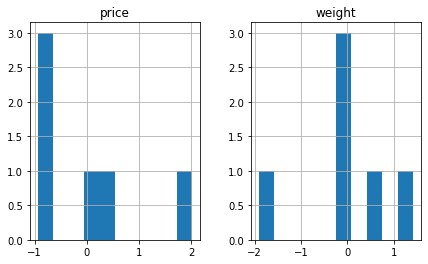

In [140]:
df_anal[['price', 'weight']].hist(figsize=[7,4])